# 4a. Model Development for Random Forest

## A360 MDK interface

In [1]:
a360ai

<A360 AI Interface for project: use-case-logistics>

In [2]:
# Get default data repo
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'use-case-logistics'

### Import Necessary Packages

In [3]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## 1. Set Default Data Repo and load data

In [4]:
a360ai.set_default_datarepo(DATAREPO)


In [5]:
a360ai.list_datasets()


,base_name,extension,size
1,X.parquet,parquet,3213246.0
2,data_traffic_congestion_2020.csv,csv,36377405.0
3,y.parquet,parquet,1503289.0


### Load Data

In [6]:
X = a360ai.load_dataset("X.parquet")
y = a360ai.load_dataset("y.parquet")

### Split the Train and Test Data 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [8]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (194357, 143)
Shape of test set :  (83297, 143)
Percentage of classes in training set:
Data_prediction
0                  0.500116
1                  0.499884
dtype: float64
Percentage of classes in test set:
Data_prediction
1                  0.50027
0                  0.49973
dtype: float64


Earlier we coverted 0 to being smooth and 1 being congested <br> Above we see that 70% of the data is in the Training set and 30% of the data is in the test set

### Defining functions to get the model performance metrics and build the confusion matrix 

In [9]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [10]:
#defining function to build the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Random Forest Model 

In [11]:
model_rf = a360ai.get_or_create_model(model_name=f"logistics_r")

In [12]:
experiment = model_rf.get_or_create_experiment(
    experiment_name = f"logitics_rf_model",
    model_flavor = "sklearn",
    enable_drift_monitoring=True,
    train_features=X_train,
    train_target=y_train,
    feature_names=list(X.columns),
    data_exploration_file= "/home/jovyan/EDA.ipynb",
    data_preparation_file= "/home/jovyan/Preprocessing-2.ipynb",
    model_training_file= "/home/jovyan/model_development_rf.ipynb",
)


//-- Experiment Loaded --//
Model Name: logistics_r
Experiment Name: logitics_rf_model
Final Run Id: f07746b7-294b-4fb0-8fb0-deb0f5a33048
Model Flavor: sklearn
Input Signature: Fastest_Route_Distance float, Fastest_Route_Time float, month big_integer, day_of_month big_integer, day_of_year big_integer, week_of_year big_integer, year big_integer, is_wknd big_integer, is_month_start big_integer, is_month_end float, Destination_Location_7th_ave small_integer, Destination_Location_9th_avenue small_integer, Destination_Location_Al_hateem_palace small_integer, Destination_Location_D_chowk small_integer, Destination_Location_IJP road small_integer, Destination_Location_Jamia Masjid Bilal small_integer, Destination_Location_air_university small_integer, Destination_Location_alliedschool_g10 small_integer, Destination_Location_awan_shop small_integer, Destination_Location_bar_bq_tonight small_integer, Destination_Location_capital_gymkhana small_integer, Destination_Location_castpro_engineering 

In [13]:
experiments = model_rf.list_experiments()
experiments

,id,bestRun,model_id,experiment_name,best_run_id,model_flavor,input_signature,output_signature,data_exploration_file,data_preparation_file,model_training_file,baseline,train_shape,model_name,updated_at
0,0285504b-a000-4bc3-8eea-a7cfc692339b,"{'id': 'f07746b7-294b-4fb0-8fb0-deb0f5a33048',...",86daffa8-91e2-4c1c-9f0d-fc225f9fd5ba,logitics_rf_model,f07746b7-294b-4fb0-8fb0-deb0f5a33048,sklearn,"Fastest_Route_Distance float, Fastest_Route_Ti...",Data_prediction big_integer,/home/jovyan/EDA.ipynb,/home/jovyan/Preprocessing-2.ipynb,/home/jovyan/model_development_rf.ipynb,{'Fastest_Route_Distance': {'mean': 1362.05770...,[143],logistics_r,2022-06-28 21:42


In [14]:
count = 1
for n in [10,25,50,75,100,125,150]:
    with experiment.run_experiment() as run:
    
        hyperparams = {
            "n_estimators": 100,
            "max_depth": None            
        }
    
        rf = RandomForestClassifier(**hyperparams)
        rf.fit(X_train, y_train)
        train_score = rf.score(X_train, y_train)
        test_score = rf.score(X_test, y_test)

        metrics = {
            "train_score": train_score,
            "test_score": test_score,
        }

        run.log_metrics(metrics)
        run.log_hyperparameters(hyperparams)
        run.log_model(rf)
        
        print("Run " + str(count) + " Complete!")
        count = count + 1 

Run 1 Complete!
Run 2 Complete!
Run 3 Complete!
Run 4 Complete!
Run 5 Complete!
Run 6 Complete!
Run 7 Complete!


In [ ]:
runs_rf = experiment.list_runs()
runs_rf

,id,dataset,artifact_paths,metric_test_score,metric_train_score,hyperparameter_max_depth,hyperparameter_n_estimators,metadata_run_time
0,befcf7ee-337c-4750-a2b6-4b292cf9bb51,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'f28a03b8-1290-4db7-b204-1c4388f266e7'...,0.994201,0.994726,None,100,25.477650
1,f07746b7-294b-4fb0-8fb0-deb0f5a33048,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'cc8d67d9-8866-4906-bee5-5f75ea343296'...,0.994237,0.994726,None,100,28.724779
2,3619c8ef-3139-4463-a042-80b2abe35cbe,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'a42497c9-bcc2-4f27-976c-dd7b866aacae'...,0.994189,0.994726,None,100,24.965721
3,5780c85b-28e6-498f-b44d-91b7a2a4d167,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '3ca1a783-54e7-4f7d-8009-78b832c748d6'...,0.994213,0.994726,None,100,26.603370
4,0e83b85d-c940-420d-9120-4619fd10c5e3,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '2fa12a44-ba22-4b8a-ad85-5b50ce0483e3'...,0.994225,0.994726,None,100,26.692119
5,1db8d7ce-f782-41ea-96bf-1b09af098dd9,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '7928b13c-2215-4d96-9f3b-d1738a0faeba'...,0.994189,0.994726,None,100,27.303190
6,3d1c3129-e331-4dbc-980f-26699d8ef63d,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '2b9f8c3c-2cbf-45b1-9dbd-a90eaea31938'...,0.994165,0.994726,None,100,25.957846
7,b353e165-1aba-4b9c-9c31-023a9f4f237f,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '23c760d0-5657-41f5-80b8-b6600b142a33'...,0.994213,0.994726,None,100,26.778322
8,c37baf24-bed6-4494-8c96-04a2e901e6a2,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'a4287f22-a035-4328-97e9-ad2c2c2302d2'...,0.994177,0.994726,None,100,26.604865
9,39a6befe-f018-4303-ae4f-601724272395,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '630d0f28-ed03-4c63-bf81-7c833de0c01b'...,0.994249,0.994726,None,100,25.435711


In [ ]:
runs_rf.sort_values('metric_test_score',ascending=False)

,id,dataset,artifact_paths,metric_test_score,metric_train_score,hyperparameter_max_depth,hyperparameter_n_estimators,metadata_run_time
9,39a6befe-f018-4303-ae4f-601724272395,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '630d0f28-ed03-4c63-bf81-7c833de0c01b'...,0.994249,0.994726,None,100,25.435711
15,8897abd9-a4b0-4fa3-96ae-507dc764a14a,25f7b044-ec93-49f3-a9e2-ed6f488edf7a,[{'id': 'e3bcfbd8-43ab-4905-b355-5641c1d085ee'...,0.994249,0.994726,None,100,26.244010
14,c9669c91-7000-4903-a0df-854dd0c73896,25f7b044-ec93-49f3-a9e2-ed6f488edf7a,[{'id': '76c10d01-167c-452c-8bd4-a4075506544f'...,0.994249,0.994721,None,100,26.405061
18,07a1b55d-9911-4d18-a746-ef9edbfc2363,25f7b044-ec93-49f3-a9e2-ed6f488edf7a,[{'id': 'b0b185ef-febc-43b5-9460-631051558448'...,0.994237,0.994726,None,100,25.451787
1,f07746b7-294b-4fb0-8fb0-deb0f5a33048,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'cc8d67d9-8866-4906-bee5-5f75ea343296'...,0.994237,0.994726,None,100,28.724779
24,3efb207a-52fb-4d38-b1e1-2df0317387dc,25f7b044-ec93-49f3-a9e2-ed6f488edf7a,[{'id': 'cef9d488-fead-46d2-989e-5e3629bdf5a0'...,0.994237,0.994726,None,100,26.646425
28,9af69ffb-f21c-457a-aaab-20118fe4516c,25f7b044-ec93-49f3-a9e2-ed6f488edf7a,[{'id': 'b5cd28ee-fe4c-4ec3-bf3e-325acf65afb7'...,0.994225,0.994721,None,100,25.813903
22,7ac2a8b5-bb01-42f1-a7b9-09de79c6a6b8,25f7b044-ec93-49f3-a9e2-ed6f488edf7a,[{'id': '3ac24170-513b-493c-a694-c5d97beab305'...,0.994225,0.994726,None,100,27.750705
29,0c5de755-c924-4f7f-a4a5-c9e3296fcc6f,25f7b044-ec93-49f3-a9e2-ed6f488edf7a,[{'id': 'b7070453-4978-45a5-a1a4-e87b9fc115ea'...,0.994225,0.994726,None,100,26.178336
4,0e83b85d-c940-420d-9120-4619fd10c5e3,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '2fa12a44-ba22-4b8a-ad85-5b50ce0483e3'...,0.994225,0.994726,None,100,26.692119


## Get the best run from model experiments

In [17]:
best_run_id = runs_rf.sort_values("metric_test_score", ascending=False).id.values[0]
best_run_id

'39a6befe-f018-4303-ae4f-601724272395'

In [18]:
model_rf.set_final_run(experiment, best_run_id)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994726  0.995574   0.993886  0.994729
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.994201  0.99532   0.993104  0.994211


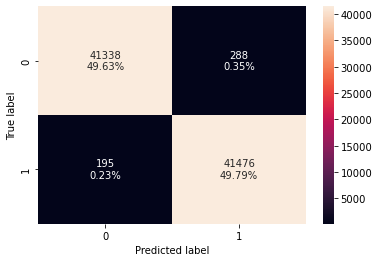

In [19]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf, X_test, y_test)

## Feature Importance

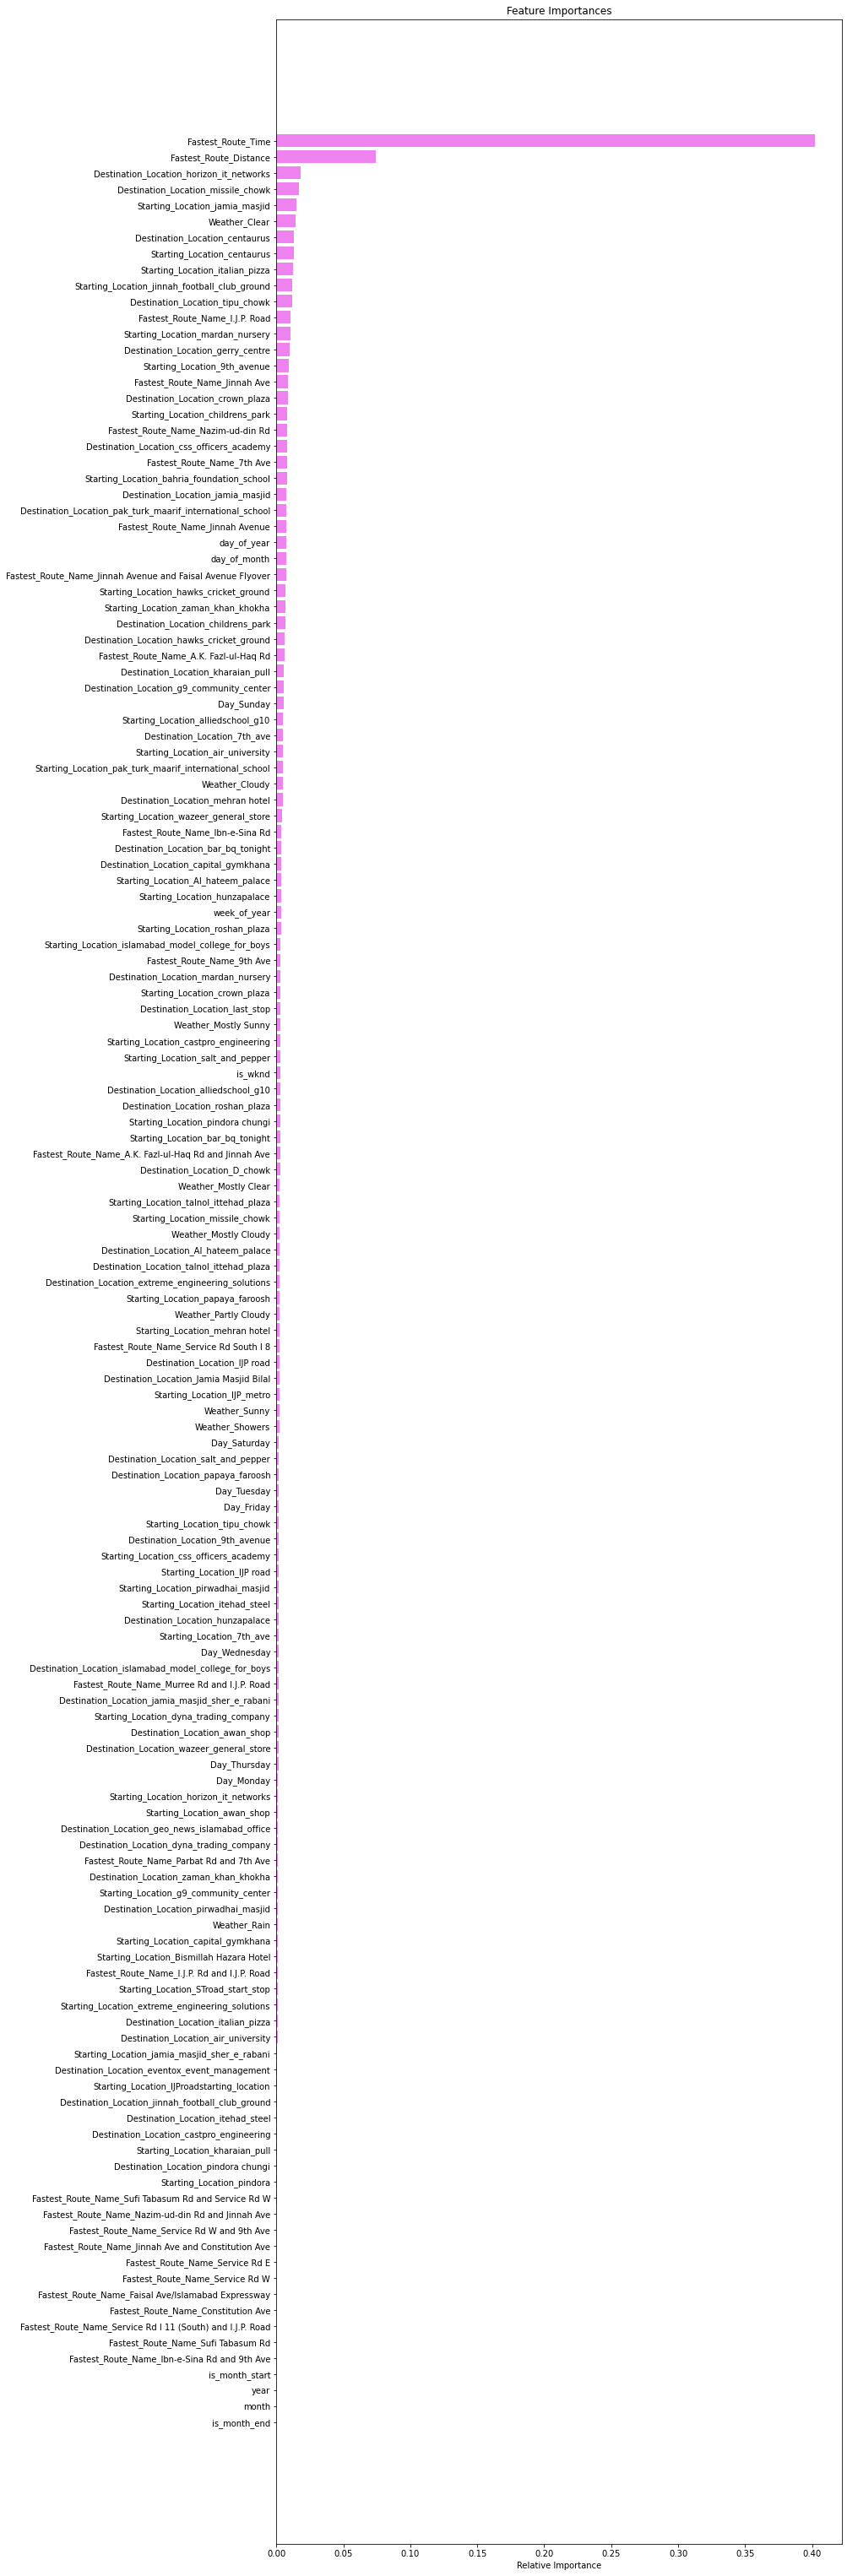

In [20]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,55))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Over here we obsereve the Most Important metric to be the Fastest_Route_Time followed by Fastest_Route_Distance. This tells us that these two features according to both the graph above. 
Also, the staring location and the destination location are important features as well.

## Bussiness Insights

The Five most important features to build the model to predict the traffic status are as follows: 
1. Fastest Route Time 
2. Fastest Route Distance 
3. Destination Location 
4. Starting Location 
5. Day of the Week 
With these features being given, current traffic situation can be predicted accurately.